In [1]:
from openslide import open_slide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff

In [2]:
slide = open_slide("F:/images SS/svs files/Reactive hyperplasia.svs")

In [3]:
from ipynb.fs.full.normalize_HnE import norm_HnE

In [4]:
smaller_region = slide.read_region((16000,16000), 0, (1024,1024))
smaller_region_RGB = smaller_region.convert('RGB')
smaller_region_np = np.array(smaller_region_RGB)

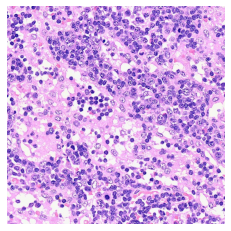

In [5]:
plt.axis('off')
plt.imshow(smaller_region_np)

In [6]:
norm_img, H_img, E_img = norm_HnE(smaller_region_np, Io=240, alpha=1, beta=0.15)

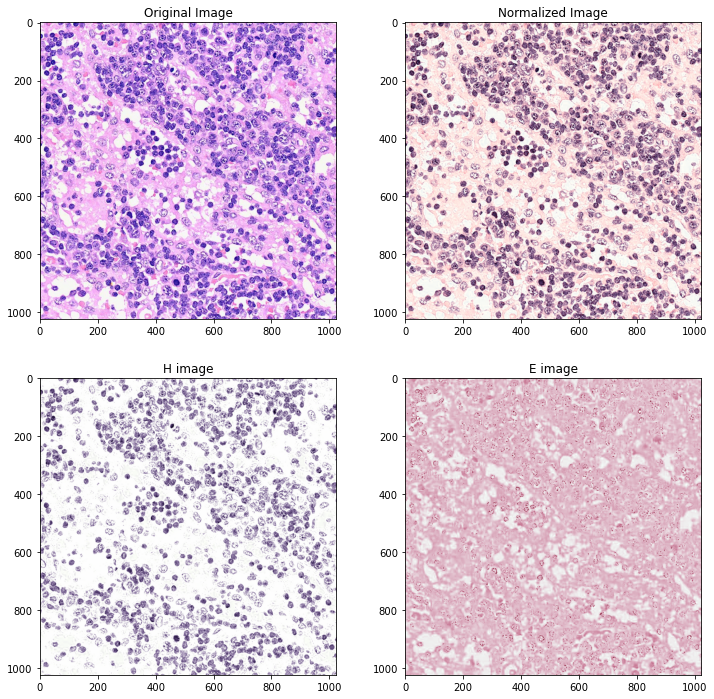

In [7]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(smaller_region_np)
plt.subplot(222)
plt.title('Normalized Image')
plt.imshow(norm_img)
plt.subplot(223)
plt.title('H image')
plt.imshow(H_img)
plt.subplot(224)
plt.title('E image')
plt.imshow(E_img)
plt.show()

In [9]:
blank = tiff.imread("F:/images SS/saved tiles/reactive lymph/original tiles/0_0.tiff")

In [10]:
norm_img, H_img, E_img = norm_HnE(blank, Io=240, alpha=1, beta=0.15)

ValueError: cannot reshape array of size 262144 into shape (3)

In [11]:
def find_mean_std_pixel_value(img_list):
    
    avg_pixel_value = []
    stddev_pixel_value= []
    for file in img_list:
        image = tiff.imread(file)
        avg = image.mean()
        std = image.std()
        avg_pixel_value.append(avg)
        stddev_pixel_value.append(std)
        
    avg_pixel_value = np.array(avg_pixel_value)  
    stddev_pixel_value=np.array(stddev_pixel_value)
        
    print("Average pixel value for all images is:", avg_pixel_value.mean())
    print("Average std dev of pixel value for all images is:", stddev_pixel_value.mean())
    
    return(avg_pixel_value, stddev_pixel_value)

In [20]:
import glob
orig_tile_dir_name = "F:/images ss/saved tiles/reactive lymph/original tiles/"

In [21]:
blank_img_list=(glob.glob(orig_tile_dir_name+"blank/*.tiff"))
partial_img_list=(glob.glob(orig_tile_dir_name+"partial/*.tiff"))
good_img_list=(glob.glob(orig_tile_dir_name+"good/*.tiff"))

In [22]:
blank_img_stats = find_mean_std_pixel_value(blank_img_list)
partial_img_stats = find_mean_std_pixel_value(partial_img_list)
good_img_stats = find_mean_std_pixel_value(good_img_list)

Average pixel value for all images is: 248.79579598563058
Average std dev of pixel value for all images is: 3.6681852465261358
Average pixel value for all images is: 247.77557373046875
Average std dev of pixel value for all images is: 6.650030368623542
Average pixel value for all images is: 227.506921005249
Average std dev of pixel value for all images is: 38.17155088948756


In [23]:
from openslide.deepzoom import DeepZoomGenerator

In [24]:
tiles = DeepZoomGenerator(slide, tile_size=256, overlap=0, limit_bounds=False)

In [29]:
print("The number of levels in the tiles object are: ", tiles.level_count)
print("The dimensions of data in each level are: ", tiles.level_dimensions)
print("Total number of tiles = : ", tiles.tile_count)

The number of levels in the tiles object are:  16
The dimensions of data in each level are:  ((1, 1), (2, 2), (4, 4), (7, 7), (13, 14), (26, 27), (52, 54), (103, 108), (205, 216), (410, 431), (819, 861), (1637, 1722), (3274, 3444), (6547, 6888), (13094, 13776), (26187, 27552))
Total number of tiles = :  14894


In [31]:
cols, rows = tiles.level_tiles[15]

In [32]:
orig_tile_dir_name = "F:/images ss/saved tiles/reactive lymph/original tiles/"
norm_tile_dir_name = "F:/images ss/saved tiles/reactive lymph/normalized tiles/"
H_tile_dir_name = "F:/images ss/saved tiles/reactive lymph/H tiles/"
E_tile_dir_name = "F:/images ss/saved tiles/reactive lymph/E tiles/"

In [33]:
for row in range(rows):
    for col in range(cols):
        tile_name = str(col) + "_" + str(row)
        temp_tile = tiles.get_tile(15, (col, row))
        temp_tile_RGB = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_RGB)
        tiff.imsave(orig_tile_dir_name+tile_name + ".tiff", temp_tile_np)
        
        if temp_tile_np.mean() < 230 and temp_tile_np.std() > 15:
            print("Processing tile number:", tile_name)
            norm_img, H_img, E_img = norm_HnE(temp_tile_np, Io=240, alpha=1, beta=0.15)     
            
            tiff.imsave(norm_tile_dir_name+tile_name + "_norm.tif", norm_img)
            tiff.imsave(H_tile_dir_name+tile_name + "_H.tif", H_img)
            tiff.imsave(E_tile_dir_name+tile_name + "_E.tif", E_img)
            
        else:
            print("NOT PROCESSING TILE:", tile_name)

NOT PROCESSING TILE: 0_0
NOT PROCESSING TILE: 1_0
NOT PROCESSING TILE: 2_0
NOT PROCESSING TILE: 3_0
NOT PROCESSING TILE: 4_0
NOT PROCESSING TILE: 5_0
NOT PROCESSING TILE: 6_0
NOT PROCESSING TILE: 7_0
NOT PROCESSING TILE: 8_0
NOT PROCESSING TILE: 9_0
NOT PROCESSING TILE: 10_0
NOT PROCESSING TILE: 11_0
NOT PROCESSING TILE: 12_0
NOT PROCESSING TILE: 13_0
NOT PROCESSING TILE: 14_0
NOT PROCESSING TILE: 15_0
NOT PROCESSING TILE: 16_0
NOT PROCESSING TILE: 17_0
NOT PROCESSING TILE: 18_0
NOT PROCESSING TILE: 19_0
NOT PROCESSING TILE: 20_0
NOT PROCESSING TILE: 21_0
NOT PROCESSING TILE: 22_0
NOT PROCESSING TILE: 23_0
NOT PROCESSING TILE: 24_0
NOT PROCESSING TILE: 25_0
NOT PROCESSING TILE: 26_0
NOT PROCESSING TILE: 27_0
NOT PROCESSING TILE: 28_0
NOT PROCESSING TILE: 29_0
NOT PROCESSING TILE: 30_0
NOT PROCESSING TILE: 31_0
NOT PROCESSING TILE: 32_0
NOT PROCESSING TILE: 33_0
NOT PROCESSING TILE: 34_0
NOT PROCESSING TILE: 35_0
NOT PROCESSING TILE: 36_0
NOT PROCESSING TILE: 37_0
NOT PROCESSING TILE: 3

NOT PROCESSING TILE: 7_3
NOT PROCESSING TILE: 8_3
NOT PROCESSING TILE: 9_3
NOT PROCESSING TILE: 10_3
NOT PROCESSING TILE: 11_3
NOT PROCESSING TILE: 12_3
NOT PROCESSING TILE: 13_3
NOT PROCESSING TILE: 14_3
NOT PROCESSING TILE: 15_3
NOT PROCESSING TILE: 16_3
NOT PROCESSING TILE: 17_3
NOT PROCESSING TILE: 18_3
NOT PROCESSING TILE: 19_3
NOT PROCESSING TILE: 20_3
NOT PROCESSING TILE: 21_3
NOT PROCESSING TILE: 22_3
NOT PROCESSING TILE: 23_3
NOT PROCESSING TILE: 24_3
NOT PROCESSING TILE: 25_3
NOT PROCESSING TILE: 26_3
NOT PROCESSING TILE: 27_3
NOT PROCESSING TILE: 28_3
NOT PROCESSING TILE: 29_3
NOT PROCESSING TILE: 30_3
NOT PROCESSING TILE: 31_3
NOT PROCESSING TILE: 32_3
NOT PROCESSING TILE: 33_3
Processing tile number: 34_3
Processing tile number: 35_3
Processing tile number: 36_3
Processing tile number: 37_3
NOT PROCESSING TILE: 38_3
NOT PROCESSING TILE: 39_3
NOT PROCESSING TILE: 40_3
NOT PROCESSING TILE: 41_3
NOT PROCESSING TILE: 42_3
NOT PROCESSING TILE: 43_3
Processing tile number: 44_3


NOT PROCESSING TILE: 8_6
NOT PROCESSING TILE: 9_6
NOT PROCESSING TILE: 10_6
NOT PROCESSING TILE: 11_6
NOT PROCESSING TILE: 12_6
NOT PROCESSING TILE: 13_6
NOT PROCESSING TILE: 14_6
NOT PROCESSING TILE: 15_6
NOT PROCESSING TILE: 16_6
NOT PROCESSING TILE: 17_6
NOT PROCESSING TILE: 18_6
NOT PROCESSING TILE: 19_6
NOT PROCESSING TILE: 20_6
NOT PROCESSING TILE: 21_6
NOT PROCESSING TILE: 22_6
NOT PROCESSING TILE: 23_6
NOT PROCESSING TILE: 24_6
NOT PROCESSING TILE: 25_6
NOT PROCESSING TILE: 26_6
NOT PROCESSING TILE: 27_6
Processing tile number: 28_6
Processing tile number: 29_6
Processing tile number: 30_6
Processing tile number: 31_6
Processing tile number: 32_6
Processing tile number: 33_6
Processing tile number: 34_6
Processing tile number: 35_6
Processing tile number: 36_6
Processing tile number: 37_6
Processing tile number: 38_6
Processing tile number: 39_6
Processing tile number: 40_6
Processing tile number: 41_6
Processing tile number: 42_6
Processing tile number: 43_6
Processing tile nu

NOT PROCESSING TILE: 4_9
NOT PROCESSING TILE: 5_9
NOT PROCESSING TILE: 6_9
NOT PROCESSING TILE: 7_9
NOT PROCESSING TILE: 8_9
NOT PROCESSING TILE: 9_9
NOT PROCESSING TILE: 10_9
NOT PROCESSING TILE: 11_9
NOT PROCESSING TILE: 12_9
NOT PROCESSING TILE: 13_9
NOT PROCESSING TILE: 14_9
NOT PROCESSING TILE: 15_9
NOT PROCESSING TILE: 16_9
NOT PROCESSING TILE: 17_9
NOT PROCESSING TILE: 18_9
NOT PROCESSING TILE: 19_9
Processing tile number: 20_9
Processing tile number: 21_9
Processing tile number: 22_9
Processing tile number: 23_9
Processing tile number: 24_9
Processing tile number: 25_9
Processing tile number: 26_9
Processing tile number: 27_9
Processing tile number: 28_9
Processing tile number: 29_9
Processing tile number: 30_9
Processing tile number: 31_9
NOT PROCESSING TILE: 32_9
Processing tile number: 33_9
Processing tile number: 34_9
Processing tile number: 35_9
Processing tile number: 36_9
Processing tile number: 37_9
Processing tile number: 38_9
NOT PROCESSING TILE: 39_9
Processing tile 

NOT PROCESSING TILE: 94_11
NOT PROCESSING TILE: 95_11
NOT PROCESSING TILE: 96_11
NOT PROCESSING TILE: 97_11
NOT PROCESSING TILE: 98_11
NOT PROCESSING TILE: 99_11
NOT PROCESSING TILE: 100_11
NOT PROCESSING TILE: 101_11
NOT PROCESSING TILE: 102_11
NOT PROCESSING TILE: 0_12
NOT PROCESSING TILE: 1_12
NOT PROCESSING TILE: 2_12
NOT PROCESSING TILE: 3_12
NOT PROCESSING TILE: 4_12
NOT PROCESSING TILE: 5_12
NOT PROCESSING TILE: 6_12
NOT PROCESSING TILE: 7_12
NOT PROCESSING TILE: 8_12
NOT PROCESSING TILE: 9_12
NOT PROCESSING TILE: 10_12
NOT PROCESSING TILE: 11_12
NOT PROCESSING TILE: 12_12
NOT PROCESSING TILE: 13_12
Processing tile number: 14_12
Processing tile number: 15_12
Processing tile number: 16_12
Processing tile number: 17_12
Processing tile number: 18_12
Processing tile number: 19_12
Processing tile number: 20_12
Processing tile number: 21_12
Processing tile number: 22_12
Processing tile number: 23_12
Processing tile number: 24_12
Processing tile number: 25_12
Processing tile number: 26

KeyboardInterrupt: 